In [89]:
# config
shutter_maps_dir = '/Users/mka/DataspellProjects/oca-fits-anal/maps'
shutter_map_pattern = '????c*map*.fits'


# Shutter maps visualization

In [90]:
from pathlib import Path
from astropy.io import fits as pyfits
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy import stats

Collecting shutter maps in directory

In [91]:
# glob to list:
files = list(Path(shutter_maps_dir).glob(shutter_map_pattern))
files.sort()
for f in files:
    print(f.name)

jk15c_B_master_shutter_map.fits
jk15c_Ic_master_shutter_map.fits
jk15c_V_master_shutter_map.fits
jk15c_b_s_master_shutter_map.bad.fits
jk15c_g_master_shutter_map.fits
jk15c_master_shutter_map.fits
jk15c_r_master_shutter_map.fits
jk15c_v_s_master_shutter_map.bad.fits
jk15c_y_s_master_shutter_map.fits


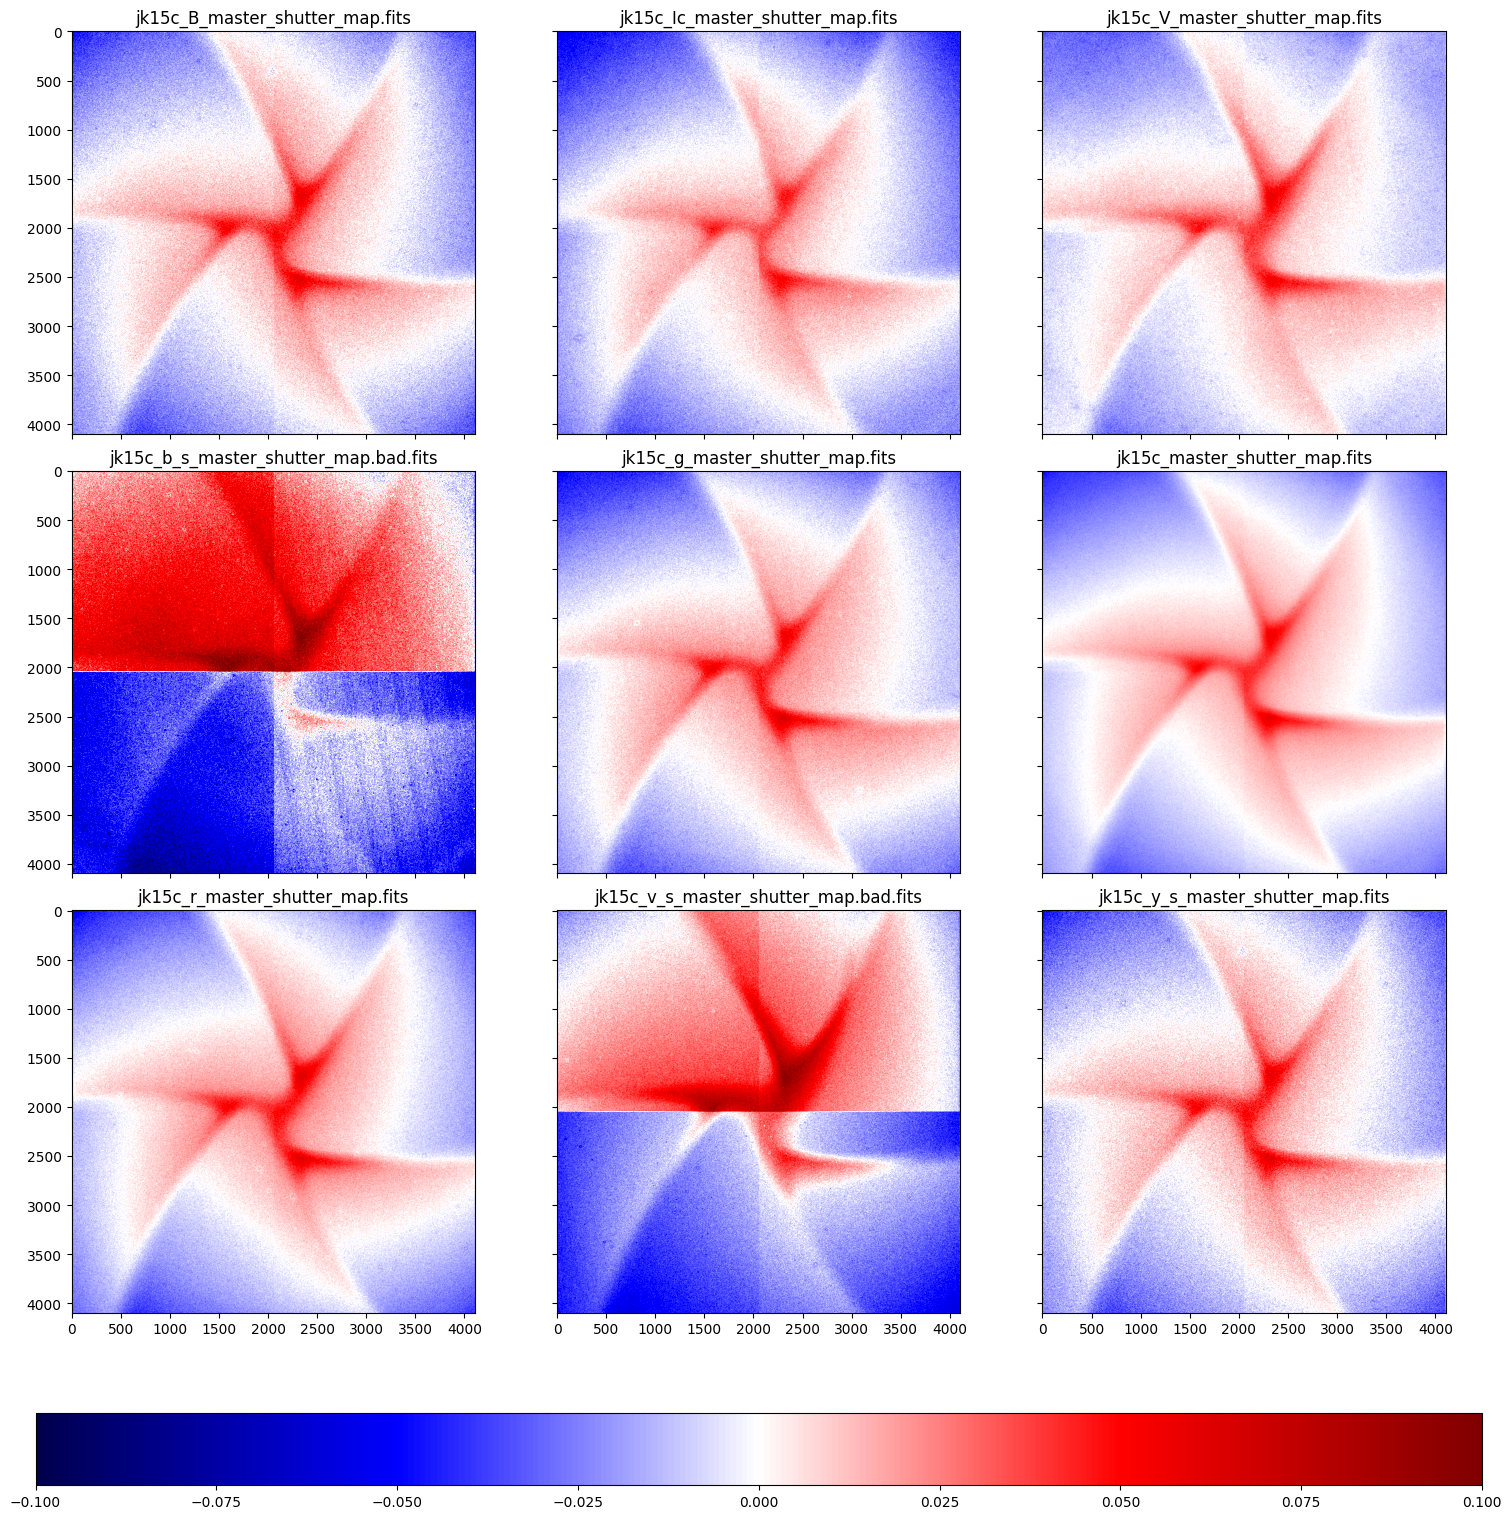

In [92]:
# Now plot 3 columns of shutter maps
col_no = 3
row_no = int(np.ceil(len(files) / col_no))

fig, ax = plt.subplots(row_no, col_no, figsize=(15, row_no * 5), sharex=True, sharey=True, constrained_layout=True, squeeze=False)

for i, f in enumerate(files):
    with pyfits.open(f) as hdul:
        shutter_map = hdul[0].data
        shutter_map = ma.masked_where(shutter_map == 0, shutter_map)
        ax[i // col_no, i % col_no].imshow(shutter_map, cmap='seismic', vmin=-0.1, vmax=0.1)
        ax[i // col_no, i % col_no].set_title(f.name)
fig.colorbar(ax[0, 0].imshow(shutter_map, cmap='seismic', vmin=-0.1, vmax=0.1), ax=ax, orientation='horizontal')
plt.show()
